In [1]:
from sklearn.cluster import KMeans
from scipy.cluster.vq import vq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Génération des données

In [2]:
n = 200
x = []
y = []
k = 0

for i in range(n):
    if k < n//2: 
        x.append(float(np.random.normal(0, 1, 1)))
        y.append(float(np.random.normal(0, 1, 1)))
    else : 
        x.append(float(np.random.normal(4, 2, 1)))
        y.append(float(np.random.normal(4, 2, 1)))
    k += 1

d = pd.DataFrame([x,y]).T
d.columns = ["x","y"]
d

,x,y
0,0.091142,0.521486
1,-0.649731,-0.662899
2,0.120682,0.053233
3,-0.842986,1.503738
4,-0.064332,1.034509
...,...,...
195,4.639448,2.711076
196,5.925170,7.358998
197,1.525993,6.263160
198,7.543793,-0.185538


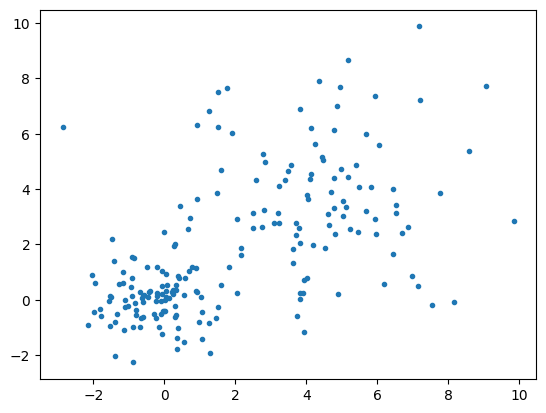

In [3]:
plt.plot(d.iloc[:,0], d.iloc[:,1], '.')

Les données sont générées de manière aléatoire. Sur le graphique, nous remarquons 2 groupes non distinct. 

## K means

In [4]:
kmeans = KMeans(2).fit(d)

Label de chaque point : 

In [5]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0])

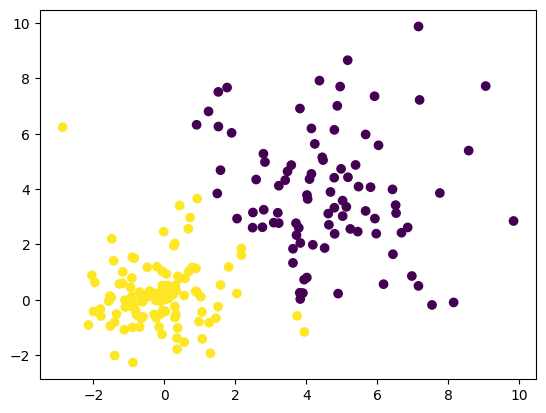

In [6]:
plt.scatter(d.iloc[:,0],d.iloc[:,1], c=kmeans.labels_)

Coordonnées des centres des clusters : 

In [7]:
kmeans.cluster_centers_

array([[ 4.60413519,  3.85759862],
       [-0.10987887,  0.21329521]])

In [8]:
df = d
df['kmean'] = kmeans.labels_
df

,x,y,kmean
0,0.091142,0.521486,1
1,-0.649731,-0.662899,1
2,0.120682,0.053233,1
3,-0.842986,1.503738,1
4,-0.064332,1.034509,1
...,...,...,...
195,4.639448,2.711076,0
196,5.925170,7.358998,0
197,1.525993,6.263160,0
198,7.543793,-0.185538,0


In [9]:
df['kmean'].value_counts()

1    110
0     90
Name: kmean, dtype: int64

## Inertie intra classe : 

In [10]:
kmeans.inertia_/n

5.131480211850273

## Trouver le meilleur nombre de clusters

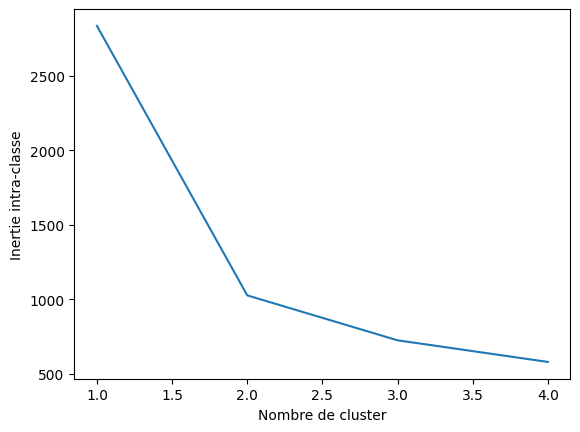

In [11]:
#Détermination de la valeur optimale de K
tab=[]
for i in range(1,5):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(d)
    tab.append(kmeans.inertia_)
plt.plot(range(1,5),tab)
plt.xlabel("Nombre de cluster")
plt.ylabel("Inertie intra-classe")
plt.show()

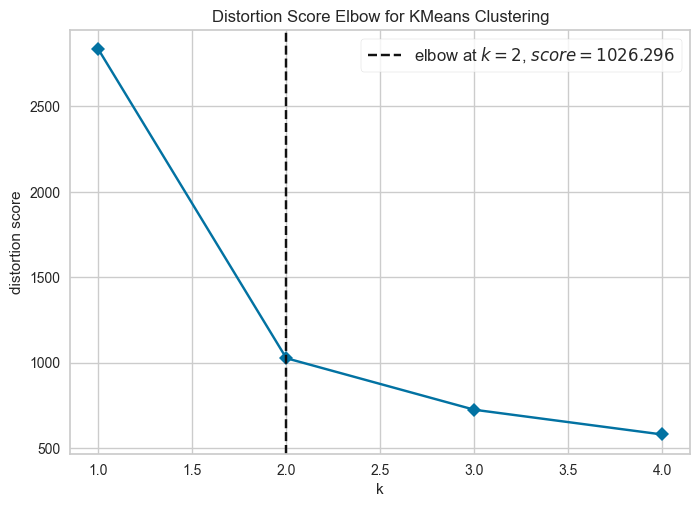

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,5),timings=False).fit(d)
visualizer.show()

## Graphique pour 3 clusters : 

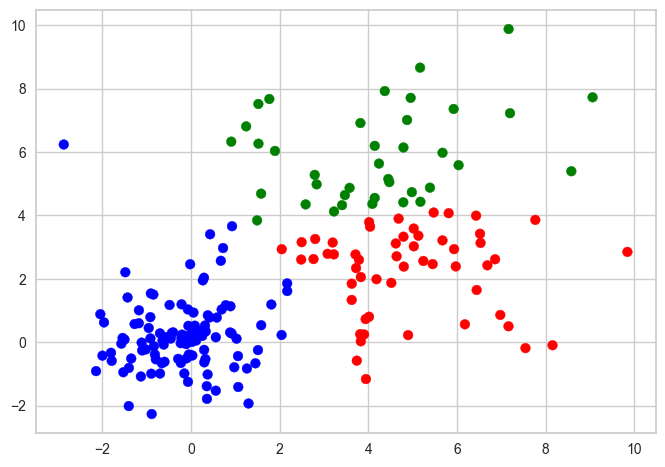

In [13]:
kmeans3 = KMeans(3).fit(d)
colors = ['red','blue','green']
plt.scatter(d.iloc[:,0],d.iloc[:,1], c=[colors[l_ ]for l_ in kmeans3.labels_])

Les individus sont assez proches les un des autres mais dans des classes différentes. De ce fait, il est préférable de prendre 2 classes.

# Test avec les données Iris

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

In [16]:
from sklearn.preprocessing import scale
X = scale(X_iris)
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

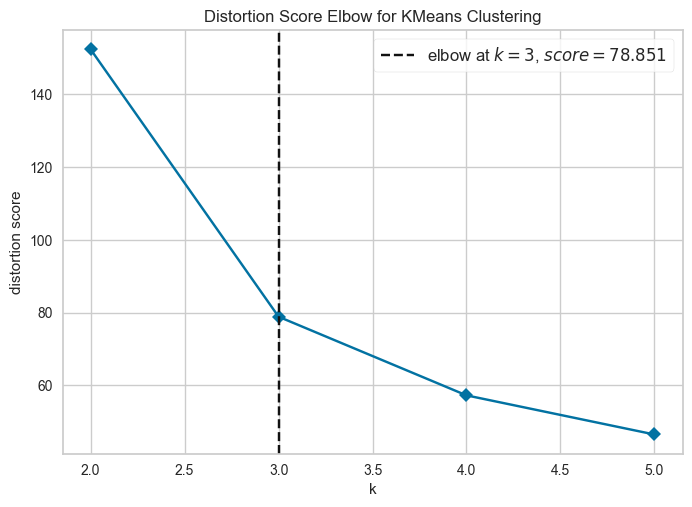

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,6),timings=False).fit(X_iris)
visualizer.show()

Il est préférable de prendre 3 classes.

Coordonnées des centres des clusters : 

In [18]:
centre_gravite = []
for i in range(2,6):
    kmeans_iris = KMeans(i).fit(X)
    centre_gravite.append(kmeans_iris.cluster_centers_)

centre_gravite

[array([[ 0.50728948, -0.42663134,  0.65249366,  0.62744675],
        [-1.01457897,  0.85326268, -1.30498732, -1.25489349]]),
 array([[-0.06881714, -0.89339955,  0.34522179,  0.28439302],
        [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
        [ 1.13140499,  0.07903422,  0.98537152,  0.99908828]]),
 array([[ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
        [-0.74922133,  1.43007001, -1.29759846, -1.22142131],
        [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
        [-1.35230687,  0.11914427, -1.31439133, -1.29749445]]),
 array([[-0.73912401,  1.45382047, -1.29812473, -1.21793897],
        [-0.33846225, -1.30137905,  0.13982007,  0.05879571],
        [ 0.44478706, -0.34299318,  0.61000768,  0.55482966],
        [ 1.40150837,  0.23463019,  1.20272206,  1.28307253],
        [-1.33793914,  0.14826006, -1.31304341, -1.29827488]])]

In [19]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=4)

pca_iris = pca.fit(X)
X_iris_PCA = pca.fit(X).transform(X)

Valeurs de variance : 

In [20]:
pca_iris.singular_values_

array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

Pourcentages : 

In [21]:
pca_iris.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

Il est préférable de prendre deux composantes car la 3ème représente 1/3 des variables. Les deux premières expliquent bien les données.

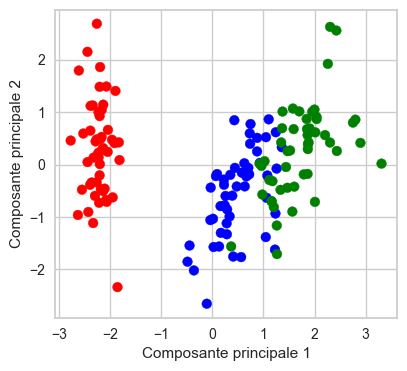

In [22]:
def graph_acp2(comp1, comp2, y):
    plt.figure(figsize=(15,4))
    plt.subplot(1, 3, 1)
    plt.xlabel('Composante principale 1')
    plt.ylabel('Composante principale 2')
    plt.scatter(comp1, comp2, c=[colors[l_ ]for l_ in y])
    plt.show()

graph_acp2(X_iris_PCA[:, 0], X_iris_PCA[:, 1], y_iris)